 # Table of Contents  
1. [Abstract](#1)   
1. [Data Set Description](#1)  
    1. [Variable Describtions](#7) 
1. [Imports](#1)  
1. [Exploring The Data](#1) 
    1. [Loading](#7) 
    1. [Handling Missing Values](#7)
    1. [Variable Correlations](#7)
    1. [Target Variable Distribution](#7)
    1. [Outliers](#7)
1. [Prepering Data for models](#4)     
    1. [Remove target column](#5)
    1. [Splitting the Data](#5)   
    1. [Feature Scaling](#5) 
1. [First Model - SGD](#8)     
    1. [Feature Selection - Ridge, Lasso, ](#9)  
    1. [Run model](#9)    
    1. [Evaluating on Validation set](#10)     
    1. [Model Submission](#11)     
1. [Second Model - Random Forest](#8)     
    1. [Feature Selection - using RF](#9)  
    1. [Run model](#9)
    1. [Grid Search for Hyper Parameters](#9)
    1. [Evaluating on Validation set](#10)     
    1. [Model Submission](#11) 
1. [Third Model](#8)     
    1. [Feature Selection - ](#9)  
    1. [Run model](#9)    
    1. [Evaluating on Validation set](#10)     
    1. [ Submission](#11) 
1. [Enssemble of the Models](#8)     
    1. [Create Enssemble](#9)    
    1. [Evaluating on Validation set](#10)     
1. [Final Submission](#8) 
1. [References](#8)            

## Useful Links

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

https://www.kaggle.com/getting-started/18153#post103381

https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

submission example: https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

In [145]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# define plt settings
plt.rcParams["font.size"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["figure.figsize"] = (5,5)
%matplotlib inline

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold

from scipy.stats import uniform

## Loading the data

In [146]:
data_df = pd.read_csv("train.csv")

In [147]:
data_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [148]:
data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [149]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing Data
refference from: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

In [150]:
all_data_na =(data_df.isnull().sum() / len(data_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Data' :all_data_na})
missing_data

,Missing Data
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

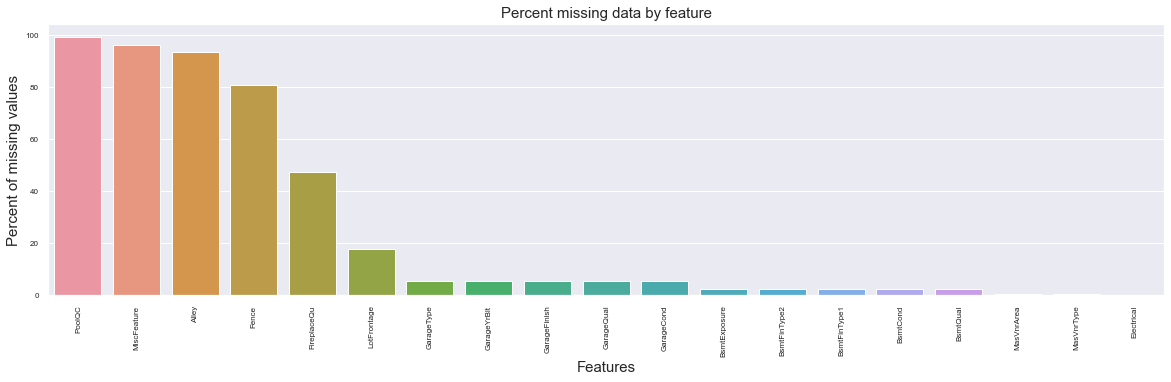

In [151]:
f, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [152]:
#PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
data_df["PoolQC"] = data_df["PoolQC"].fillna("None")
#MiscFeature : data description says NA means "no misc feature"
data_df["MiscFeature"] = data_df["MiscFeature"].fillna("None")
#Alley : data description says NA means "no alley access"
data_df["Alley"] = data_df["Alley"].fillna("None")
#Fence : data description says NA means "no fence"
data_df["Fence"] = data_df["Fence"].fillna("None")
#FireplaceQu : data description says NA means "no fireplace"
data_df["FireplaceQu"] = data_df["FireplaceQu"].fillna("None")
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_df["LotFrontage"] = data_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data_df[col] = data_df[col].fillna('None')
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data_df[col] = data_df[col].fillna(0)
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data_df[col] = data_df[col].fillna(0)
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data_df[col] = data_df[col].fillna('None')
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
data_df["MasVnrType"] = data_df["MasVnrType"].fillna("None")
data_df["MasVnrArea"] = data_df["MasVnrArea"].fillna(0)
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
data_df['MSZoning'] = data_df['MSZoning'].fillna(data_df['MSZoning'].mode()[0])
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
data_df = data_df.drop(['Utilities'], axis=1)
#Functional : data description says NA means typical
data_df["Functional"] = data_df["Functional"].fillna("Typ")
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
data_df['Electrical'] = data_df['Electrical'].fillna(data_df['Electrical'].mode()[0])
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
data_df['KitchenQual'] = data_df['KitchenQual'].fillna(data_df['KitchenQual'].mode()[0])
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
data_df['Exterior1st'] = data_df['Exterior1st'].fillna(data_df['Exterior1st'].mode()[0])
data_df['Exterior2nd'] = data_df['Exterior2nd'].fillna(data_df['Exterior2nd'].mode()[0])
#SaleType : Fill in again with most frequent which is "WD"
data_df['SaleType'] = data_df['SaleType'].fillna(data_df['SaleType'].mode()[0])
#MSSubClass : Na most likely means No building class. We can replace missing values with None
data_df['MSSubClass'] = data_df['MSSubClass'].fillna("None")

In [153]:
all_data_na =(data_df.isnull().sum() / len(data_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Data' :all_data_na})
missing_data

,Missing Data


## Exploring the Data
refference from:
https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

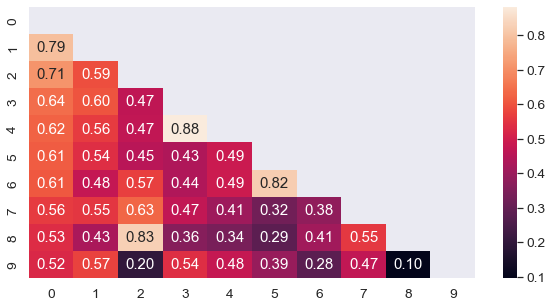

In [154]:
#saleprice correlation matrix
plt.figure(figsize=(10,5))
corr = data_df.corr()
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_df[cols].values.T)
mask = np.triu(cm)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', mask= mask)
plt.show()

<Figure size 720x360 with 0 Axes>

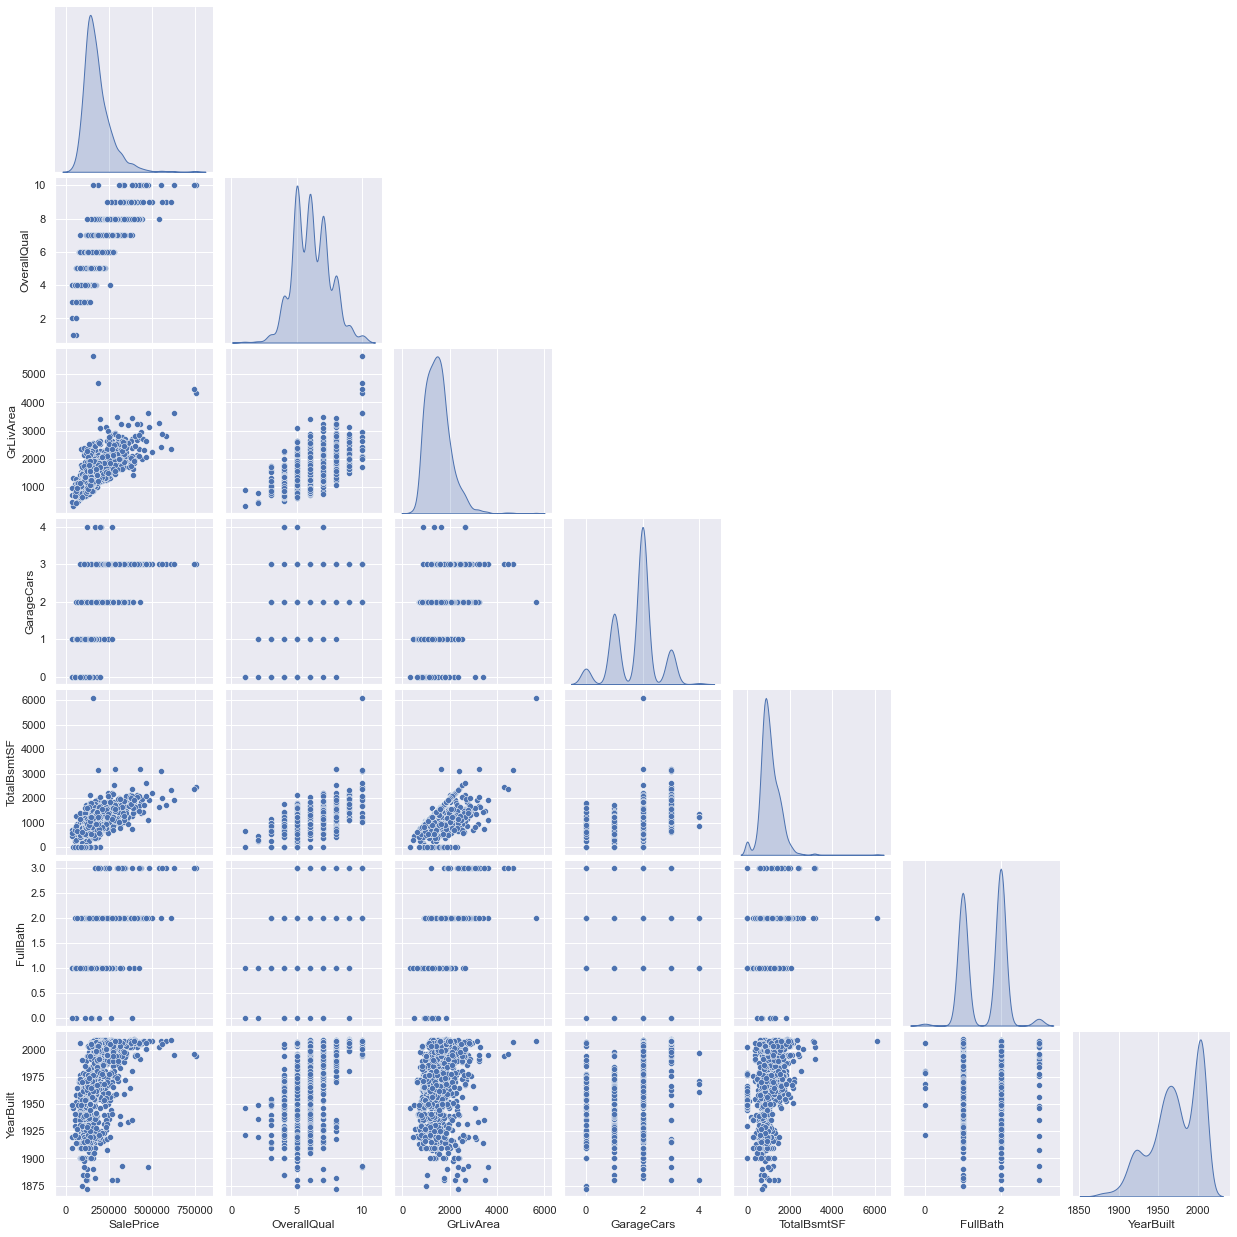

In [155]:
plt.figure(figsize=(10,5))
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_df[cols], diag_kind='kde', corner=True)
plt.show();

## Target Variable Distribution

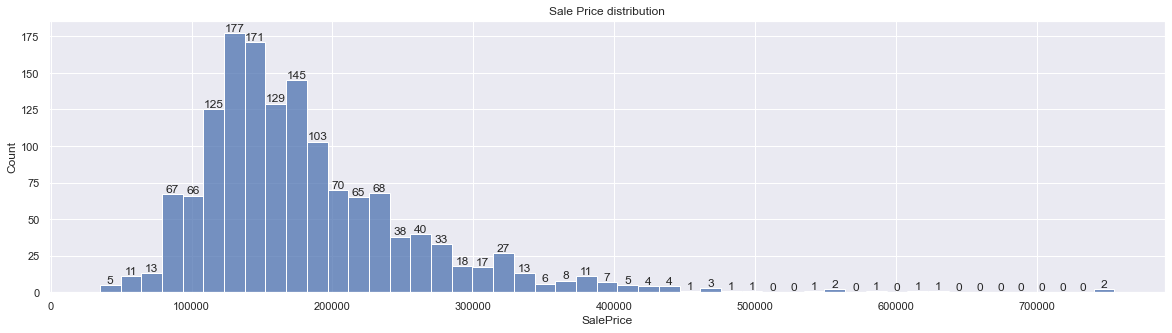

In [156]:
figure = plt.figure(figsize = (20,5))
ax = sns.histplot(data_df['SalePrice'])
plt.title("Sale Price distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

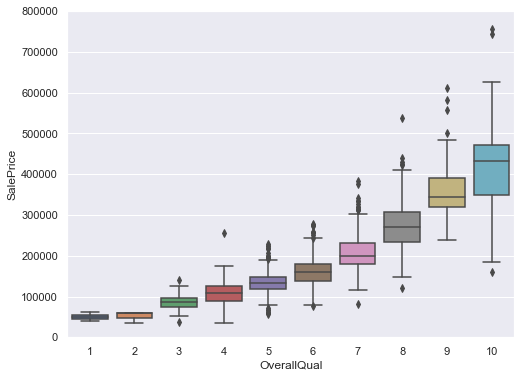

In [157]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([data_df['SalePrice'], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

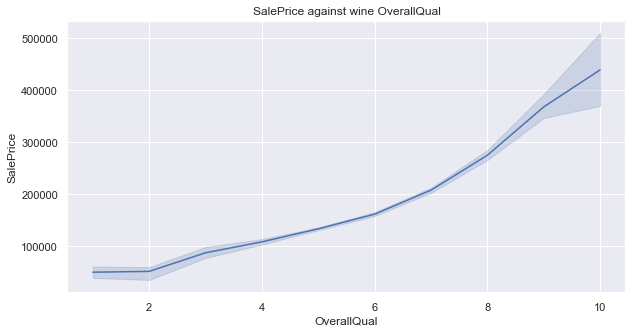

In [158]:
# plotting alcohol and quality
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "OverallQual", y = "SalePrice", data = data_df)
plt.title("SalePrice against wine OverallQual")
plt.show()

## Outliers

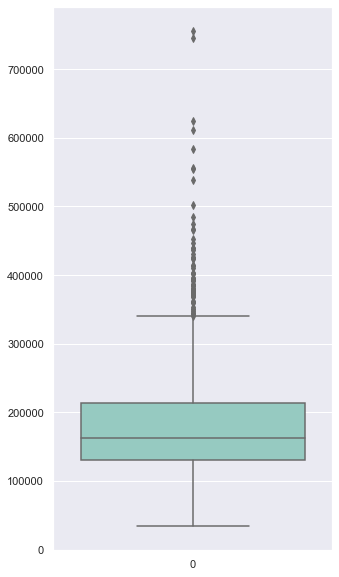

In [213]:
sns.set()
plt.figure(figsize=(5,10))
sns.boxplot(data=data_df['SalePrice'],palette="Set3")
plt.show()

In [214]:
upper_limit = data_df["SalePrice"].mean() + 3*data_df["SalePrice"].std()
print(sum(data_df["SalePrice"]>upper_limit))

22


## do this to each numeric column?

In [160]:
numerics = data_df.select_dtypes(exclude='object')
numerics = numerics.drop('Id',axis=1)

In [162]:
numerics

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [205]:
columns_to_select = ['SalePrice', 'LotArea', 'MiscVal', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF']

In [206]:
high_var = high_var.loc[:, columns_to_select]

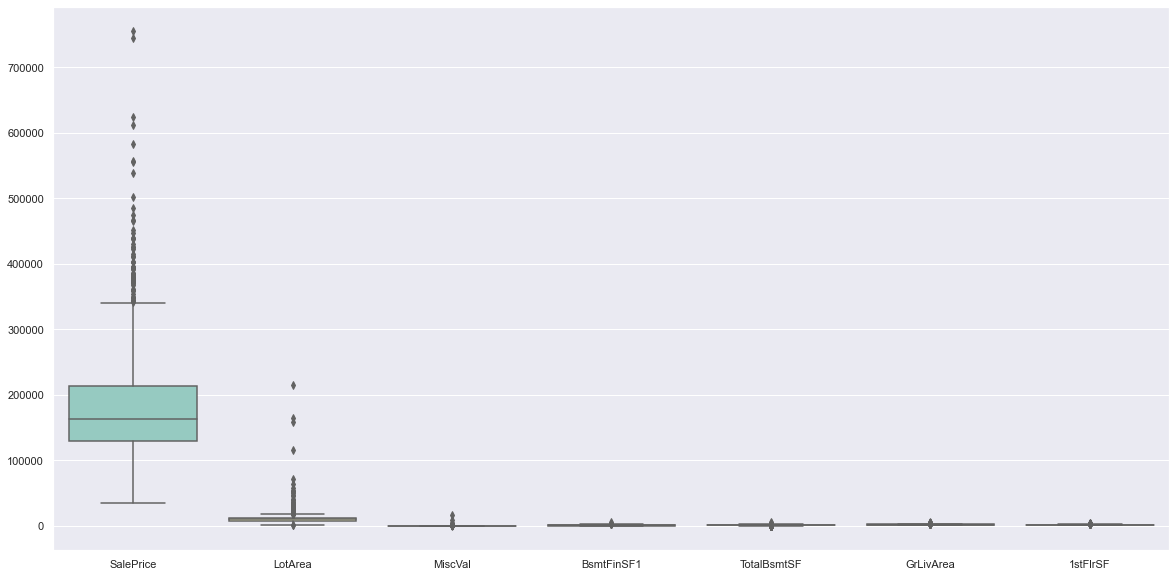

In [207]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=high_var,palette="Set3")
plt.show()

In [127]:
#MSSubClass=The building class
data_df['MSSubClass'] = data_df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
data_df['OverallCond'] = data_df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
data_df['YrSold'] = data_df['YrSold'].astype(str)
data_df['MoSold'] = data_df['MoSold'].astype(str)

In [128]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data_df[c].values)) 
    data_df[c] = lbl.transform(list(data_df[c].values))

# shape        
print('Shape all_data: {}'.format(data_df.shape))

Shape all_data: (1460, 80)


In [129]:
data_df = pd.get_dummies(data_df)
print(data_df.shape)

(1460, 222)


In [ ]:
X = data_df.drop('SalePrice',axis=1) # Independet variable
y = data_df['SalePrice'] # dependent variable